### Arquivo: gapminder_animation-FuncAnimation_PLOT_SEM-legend
# C.2 
## Questão A: Explique a metodologia para criar a animação em cada um dos casos (versões). Comente-as. Justifique


### Análise dos Códigos:

**Tem como função importar as bibliotecas, analisar e visualizar os dados**

In [3]:
# libraries
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96

**Importa o ficheiro csv do url e em sequência ler com a biblioteca pandas e confirma a sua correta importação através do head que por defaul mostra as 5 primeiras linhas**

In [4]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
#data=pd.read_csv('gapminderData.csv')
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


**Tem como função através do "pd.Categorical(data['continent'])" ler as informações da coluna e "data['continent']=pd.Categorical(data['continent'])" faz a contagem dos continentes separando as as informações em 5 valores**

In [5]:
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])

**Define a variável "anos"**

In [6]:
anos=data.year.unique()

**Inicia chamando da biblioteca o matplotlib depois é definido a altura de apresentação. Em seguida em "Add titles" é definido as labels e escala de apresentação(logarítmica) no eixo y e assim limitando os intervalos de valores apresentados em cada um dos eixos.**

**A função "def animate" foi definido a animação presente no gráfico, foi colocado no título do gráfico o nome "Year" que será apresentado em conjunto com o valor do ano; logo em seguida foi definido o "tmp" para apresentar os anos e os anos seguintes; definido os eixos "y" com o "com'gdpPercap', e o eixo "x" com 'lifeExp' o parametro "s" define o tamanho do marcardor que será definido para "coluna['pop']/2000, c= é responsável pela coloração que representa os 5 continentes, os restantes parametros relacionam'se com as características físicas da bolha.**

**Pela função "animate" é definido os frames da animação, foi definido os frames para apresentar atra´ves de "framelen(anos)", o intervalo e millisegundos e a ausência de repetições.**


<IPython.core.display.Javascript object>


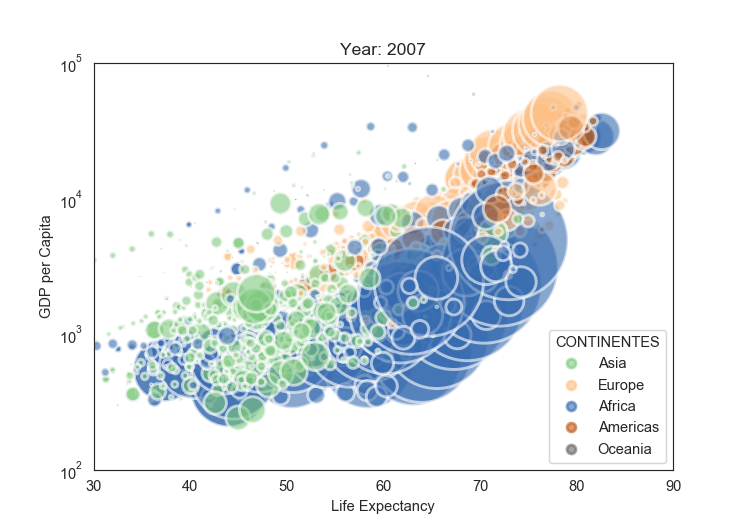

In [7]:
%matplotlib notebook
%matplotlib notebook

# initialize a figure
#fig=plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
fig, ax = plt.subplots(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.ylim(100,100000)
plt.xlim(30, 90)

def animate(i):
    plt.title("Year: "+str(anos[i]) )
    tmp=data[ data.year == anos[i] ]
    scut=plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    #scut=ax.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
    ax.legend(handles =scut.legend_elements () [0], labels = data["continent"].unique(), loc="lower right", title= "CONTINENTES")
    
ani = animation.FuncAnimation(fig, animate, frames=len(anos), interval=200, blit=False, repeat=False)
    
plt.show()



### **Método**

A forma utilizada para a contrução deste gráfico foi o plot scatter. É possível ver como ao passar dos anos, o GDP per Capita e o Life Expectancy acabam por se desenvolver. A forma como a função "animate" vai servindo como variável dos anos para encontrar todas as informações de "Life Expentacy" e "GDP per Capita" com base em cada continente, mostrando assim as informações com o passar dos anos ficando sobrepostos em cada imagem.


## Questão B:
##### Temos “bolhas” de cinco (5) cores diferentes. O que representa cada cor? Justifique, com descrição detalhada do processo.

As cores escolhidas no gráfico tem como representação os 5 continentes que foram agrupados por categorias(data['continent']=pd.Categorical(data['continent']) e obter a confirmação que o número de continente é 5 através do "numeroContinentes = data.continent.unique()". Com base no parametro " c (c=tmp['continent'].cat.codes)" que foi definido a representação das cores diversificadas nos continentes para, assim, serem apresentados no gráfico.

## Questão C:
##### Inserir uma legenda ou legendas com a cor das “bolhas” e o seu significado, posicionada(s) em área(s) que não se sobreponha(m) às “bolhas”. Fundamente as opções tomadas.

**LEGENDA**: A adição das legendas foi colocado a função "ax.legends", que foi adicionado handles, associando as labels ao data["continent"].unique(), sendo assim com um título de "Continentes" e metido no canto inferior do gráfico.

In [ ]:
ax.legend(handles =scut.legend_elements () [0], labels = data["continent"].unique(), loc="lower right", title= "CONTINENTES")